In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import  preprocessing,ensemble,metrics
from sklearn.decomposition import PCA

# ucitavanje skupa

In [29]:
df = pd.read_csv('C:/Users/Djole/Desktop/bank_transactions_data_2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

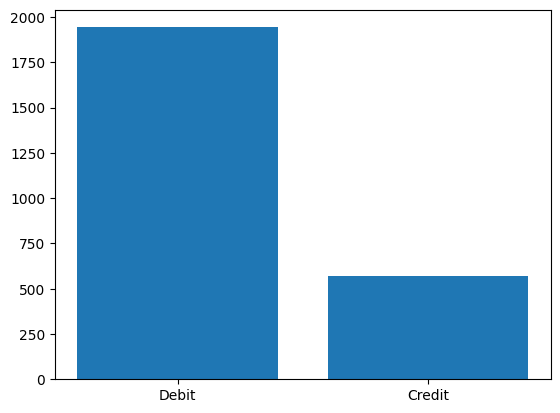

In [33]:
debit=np.sum(df['TransactionType']=="Debit")
credit=np.sum(df['TransactionType']=="Credit")
plt.bar(["Debit","Credit"],[debit,credit])
plt.show()

# prebacivanje podataka u odgovarajuci tip za ucenje

In [14]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['Month'] = df['TransactionDate'].dt.month
df['Day'] = df['TransactionDate'].dt.day
df['Hour'] = df['TransactionDate'].dt.hour
df['Minute'] = df['TransactionDate'].dt.minute

df['TransactionType'], TransactionType_unique_values = pd.factorize(df['TransactionType'])
df['Channel'],Channel_unique_values=pd.factorize(df['Channel'])
df['AccountID'],AccountID_unique_values=pd.factorize(df['AccountID'])
df['DeviceID'],DeviceID_unique_values=pd.factorize(df['DeviceID'])

df['Location'],Location_unique_values=pd.factorize(df['Location'])

df['MerchantID'],MerchantID_unique_values=pd.factorize(df['Location'])
print(len(pd.unique(df.loc[:,"MerchantID"])))
df['PreviousTransactionDate']= pd.to_datetime(df['PreviousTransactionDate'])
df['Month_previous'] = df['PreviousTransactionDate'].dt.month
df['Day_previous'] = df['PreviousTransactionDate'].dt.day
df['Hour_previous'] = df['PreviousTransactionDate'].dt.hour
df['Minute_previous'] = df['PreviousTransactionDate'].dt.minute
df.drop(columns=["TransactionDate","PreviousTransactionDate","TransactionID","IP Address","CustomerOccupation"],axis=1,inplace=True)
print(df.columns)

43
Index(['AccountID', 'TransactionAmount', 'TransactionType', 'Location',
       'DeviceID', 'MerchantID', 'Channel', 'CustomerAge',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Month',
       'Day', 'Hour', 'Minute', 'Month_previous', 'Day_previous',
       'Hour_previous', 'Minute_previous'],
      dtype='object')


# Skaliranje podataka i trening

In [15]:
x_train,x_test=model_selection.train_test_split(df,test_size=0.3)
model=ensemble.IsolationForest(n_estimators=300,verbose=0,contamination=0.05)
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
model.fit(x_train)

IsolationForest(contamination=0.05, n_estimators=300)

In [16]:
labele=model.predict(x_test)
labele=np.where(labele==-1,1,0) # prebacivanje anomalija iz -1 u 1  a ostale koje nisu anomalije su sada 0

# Plotovanje posle primene PCA da bi sveo skup na 2D

(754, 2)


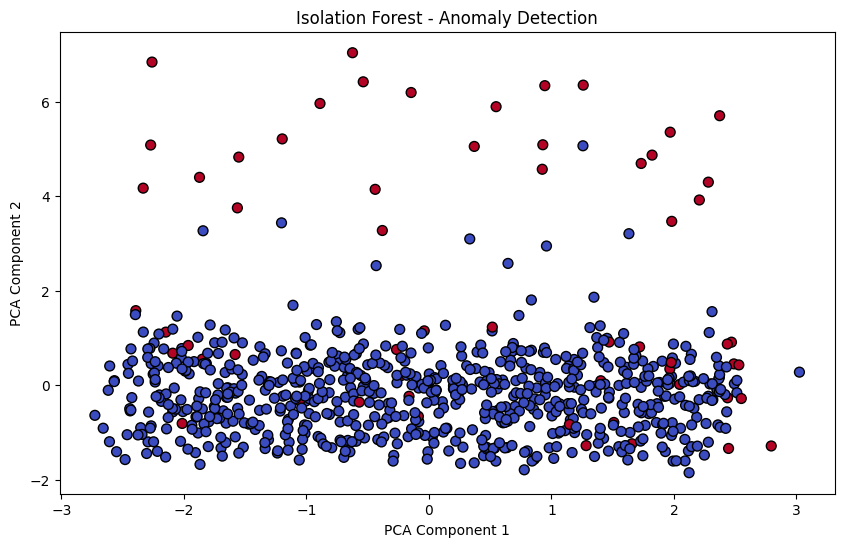

In [17]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(x_test)  # Perform PCA on x_train, not x_test
print(df_pca.shape)
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labele[:len(df_pca)], cmap='coolwarm', edgecolor='k', s=50)  # Ensure the sizes match
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()